In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Aufgabe 14

## a)
Logarithmieren hilft bestimmt. 
Wenn Größenordnung stark verschieden, ist es vielleicht sinnvoller ein kleineres $k$ zu wählen um vorzubeugen, dass in den großen Sprüngen dazwischen keine Daten liegen und vermeintlicher Noise als richtiger Wert gewertet wird. 

## b) 

Das Lernen wird durch simples Abspeichern der Trainingsdaten implementiert, insofern ist das lernen sehr ineffizient "lazy". Vermutlich wird es mit $n^k$ laufen. In der Anwendung ist das Verfahren dann aber effizient, da es lediglich mit den vorhandenen Daten abgleichen muss, also vermutlich sogar je nach Implementierung mit $log(n)$. 

## c) 
Siehe `class_structure.py` für die Lösung.

In [2]:
from collections import Counter
class KNN:
    '''KNN Classifier.

    Attributes
    ----------
    k : int
        Number of neighbors to consider.
    '''
    def __init__(self, k):
        '''Initialization.
        Parameters are stored as member variables/attributes.
        
        Parameters
        ----------
        k : int
            Number of neighbors to consider.
        '''
        self.k = k

    def fit(self, X, y):
        '''Fit routine.
        Training data is stored within object.
        
        Parameters
        ----------print(back[0])
        X : numpy.array, shape=(n_samples, n_attributes)
            Training data.
        y : numpy.array shape=(n_samples)
            Training labels.
        '''
        # Code
        self.trainingX = X
        self.trainingy = y
      

    def predict(self, X):
        '''Prediction routine.
        Predict class association of each sample of X.
        
        Parameters
        ----------
        X : numpy.array, shape=(n_samples, n_attributes)
            Data to classify.
        
        Returns
        -------
        prediction : numpy.array, shape=(n_samples)
            Predictions, containing the predicted label of each sample.
        '''
        # Code
        prediction=[]
        for i in range(len(X)):
            dist=[]
            for j in range(len(self.trainingX)):
                dist = np.append(dist, np.sqrt((X[i]-self.trainingX[j,:])@(X[i]-self.trainingX[j,:]).T))
            index = np.argsort(dist)
            index = index[:self.k-1]
            p = []
            for q in index: 
                p = np.append(p, self.trainingy[q])
            prediction = np.append(prediction, Counter(p).most_common(1)[0][0]) 
        return prediction 


## d)

In [13]:
# get necessary data and get rid of NaN
train = 100 #5000
testsignal = 250 #10000
testbackground = 400 #20000
signal = pd.read_hdf('NeutrinoMC.hdf5', key="Signal", mode="r") 
signal.head()
sigHits = signal.NumberOfHits.values
sigHits = sigHits[np.logical_not(np.isnan(sigHits))]
sigX = signal.x.values
sigX = sigX[np.logical_not(np.isnan(sigX))]
sigY = signal.y.values
sigY = sigY[np.logical_not(np.isnan(sigY))]
sig = np.array([sigHits, sigX, sigY]).T

background = pd.read_hdf('NeutrinoMC.hdf5', key="Background", mode="r")
backHits = background.NumberOfHits.values
backHits = backHits[np.logical_not(np.isnan(backHits))]
backX = background.x.values
backX = backX[np.logical_not(np.isnan(backX))]
backY = background.y.values
backY = backY[np.logical_not(np.isnan(backY))]
back = np.array([backHits, backX, backY]).T

TrainX = np.append(sig[:train], back[:train], axis=0)
TrainY = np.append(np.ones(train), np.zeros(train), axis=0)

TestX = np.append(sig[train:train+testsignal], back[train:train+testbackground], axis=0)
TestY = np.append(np.ones(testsignal), np.zeros(testbackground), axis=0)

knn = KNN(10)
newfit = knn.fit(TrainX, TrainY)
newlabel = knn.predict(TestX)

def Reinheit(testy, newy): #Test y: Signal = 1, Background = 0
    new_sig = newy[testy==1]
    return len(new_sig[new_sig==1])/len(newy==1)

def Effizienz(testy, newy):
    test_sig, new_sig = testy[testy ==1], newy[testy==1]
    return len(new_sig[new_sig==1])/len(test_sig)

def Signifikanz(testy, newy):
    test_sig, new_sig = testy[testy ==1], newy[testy==1]
    return len(new_sig[new_sig==1])/np.sqrt(len(new_sig))
    
    
rein = Reinheit(TestY, newlabel)*100
eff = Effizienz(TestY, newlabel)*100
signi = Signifikanz(TestY, newlabel)

print(f"Die Reinheit beträgt {rein:.2f} %.\nDie Effizienz beträgt {eff:.2f} %.\nDie Signifikanz beträgt {signi:.2f}.")

Die Reinheit beträgt 34.46 %.
Die Effizienz beträgt 89.60 %.
Die Signifikanz beträgt 14.17.


## e) 

In [15]:
logsigHits = np.log10(sigHits)
logbackHits = np.log10(backHits)
logSig = np.array([logsigHits, sigX, sigY]).T
logBack = np.array([logbackHits, backX, backY]).T

logTrainX = np.append(logSig[:train], logBack[:train], axis=0)
logTrainY = np.append(np.ones(train), np.zeros(train), axis=0)

logTestX = np.append(logSig[train:train+testsignal], logBack[train:train+testbackground], axis=0)
logTestY = np.append(np.ones(testsignal), np.zeros(testbackground), axis=0)

logknn = KNN(10)
lognewfit = logknn.fit(logTrainX, logTrainY)
lognewlabel = logknn.predict(logTestX)

rein = Reinheit(logTestY, lognewlabel)*100
eff = Effizienz(logTestY, lognewlabel)*100
signi = Signifikanz(logTestY, lognewlabel)

print(f"Die Reinheit beträgt {rein:.2f} %.\nDie Effizienz beträgt {eff:.2f} %.\nDie Signifikanz beträgt {signi:.2f}.")

Die Reinheit beträgt 37.85 %.
Die Effizienz beträgt 98.40 %.
Die Signifikanz beträgt 15.56.


## f) 

In [16]:
newknn = KNN(20)
newfit2 = newknn.fit(TrainX, TrainY)
newlabel2 = newknn.predict(TestX)

rein = Reinheit(TestY, newlabel2)*100
eff = Effizienz(TestY, newlabel2)*100
signi = Signifikanz(TestY, newlabel2)

print(f"Die Reinheit beträgt {rein:.2f} %.\nDie Effizienz beträgt {eff:.2f} %.\nDie Signifikanz beträgt {signi:.2f}.")

Die Reinheit beträgt 34.92 %.
Die Effizienz beträgt 90.80 %.
Die Signifikanz beträgt 14.36.


# 15 

## a)

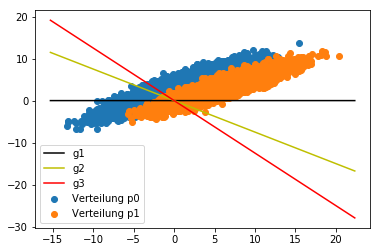

In [2]:
p0 = pd.read_hdf("./zwei_populationen.h5", key="P_0_10000")
p1 = pd.read_hdf("./zwei_populationen.h5", key="P_1")
p0 = p0.values
p1 = p1.values
plt.figure()
plt.scatter(p0[:,0],p0[:,1], label="Verteilung p0")
plt.scatter(p1[:,0], p1[:,1], label="Verteilung p1")
x = np.linspace(p0.min()-2, p1.max()+2, 10000)
y1 = 0*x
y2 = -(3/4)*x
y3 = -(5/4)*x
g1 = np.array([x,y1])
g2 = np.array([x,y2])
g3 = np.array([x,y3])
plt.plot(x, y1, "k-", label="g1" )
plt.plot(x, y2, "-y", label="g2")
plt.plot(x, y3, "-r", label="g3")
plt.legend(loc="best")
None

## b) 

In [ ]:
def proj(p, g):
    return p@g/(g.T@g)

p0_1 = proj(p0, g1)
#p0_2 = proj(p0, g2)
#p0_3 = proj(p0, g3)
plt.hist(p0_1)
#plt.hist(p0_2)
#plt.hist(p0_3)

In [ ]:
p1_1 = proj(p1, g1)
p1_2 = proj(p1, g2)
p1_3 = proj(p1, g3)
np.hist(p1_1)
np.hist(p1_2)
np.hist(p1_3)

## c) 

In [ ]:
copy paste aus letztem mal